In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Daily LA Max 1-hour NO2 Concentration 2000-2024 - Sheet26.csv')

In [ ]:
data1

,Date,Source,Site ID,POC,Daily Max 1-hour NO2 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2000,AQS,60371103,1,37.0,ppb,35,Los Angeles-North Main Street,23,96,...,Nitrogen dioxide (NO2),111,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.06659,-118.22688
1,01/02/2000,AQS,60371103,1,39.0,ppb,37,Los Angeles-North Main Street,23,96,...,Nitrogen dioxide (NO2),111,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.06659,-118.22688
2,01/03/2000,AQS,60371103,1,70.0,ppb,68,Los Angeles-North Main Street,23,96,...,Nitrogen dioxide (NO2),111,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.06659,-118.22688
3,01/04/2000,AQS,60371103,1,60.0,ppb,57,Los Angeles-North Main Street,23,96,...,Nitrogen dioxide (NO2),111,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.06659,-118.22688
4,01/05/2000,AQS,60371103,1,81.0,ppb,80,Los Angeles-North Main Street,23,96,...,Nitrogen dioxide (NO2),111,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.06659,-118.22688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8556,11/26/2024,AQS,60371103,1,46.4,ppb,43,Los Angeles-North Main Street,24,100,...,Nitrogen dioxide (NO2),99,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.06659,-118.22688
8557,11/27/2024,AQS,60371103,1,24.3,ppb,23,Los Angeles-North Main Street,24,100,...,Nitrogen dioxide (NO2),99,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.06659,-118.22688
8558,11/28/2024,AQS,60371103,1,33.9,ppb,31,Los Angeles-North Main Street,24,100,...,Nitrogen dioxide (NO2),99,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.06659,-118.22688
8559,11/29/2024,AQS,60371103,1,30.2,ppb,28,Los Angeles-North Main Street,24,100,...,Nitrogen dioxide (NO2),99,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.06659,-118.22688


In [ ]:
data1.drop(['Source', 'Site ID', 'Daily Obs Count', 'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description', 'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State', 'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'], axis=1, inplace=True)

In [ ]:
data1.shape

(8561, 6)

In [ ]:
data1

,Date,POC,Daily Max 1-hour NO2 Concentration,Units,Daily AQI Value,Local Site Name
0,01/01/2000,1,37.0,ppb,35,Los Angeles-North Main Street
1,01/02/2000,1,39.0,ppb,37,Los Angeles-North Main Street
2,01/03/2000,1,70.0,ppb,68,Los Angeles-North Main Street
3,01/04/2000,1,60.0,ppb,57,Los Angeles-North Main Street
4,01/05/2000,1,81.0,ppb,80,Los Angeles-North Main Street
...,...,...,...,...,...,...
8556,11/26/2024,1,46.4,ppb,43,Los Angeles-North Main Street
8557,11/27/2024,1,24.3,ppb,23,Los Angeles-North Main Street
8558,11/28/2024,1,33.9,ppb,31,Los Angeles-North Main Street
8559,11/29/2024,1,30.2,ppb,28,Los Angeles-North Main Street


In [ ]:
data1.drop(['Units', 'Local Site Name'], axis=1, inplace=True)

In [ ]:
data1

,Date,POC,Daily Max 1-hour NO2 Concentration,Daily AQI Value
0,01/01/2000,1,37.0,35
1,01/02/2000,1,39.0,37
2,01/03/2000,1,70.0,68
3,01/04/2000,1,60.0,57
4,01/05/2000,1,81.0,80
...,...,...,...,...
8556,11/26/2024,1,46.4,43
8557,11/27/2024,1,24.3,23
8558,11/28/2024,1,33.9,31
8559,11/29/2024,1,30.2,28


In [ ]:
data1.drop(['POC'], axis=1, inplace=True)

In [ ]:
data1

,Date,Daily Max 1-hour NO2 Concentration,Daily AQI Value
0,01/01/2000,37.0,35
1,01/02/2000,39.0,37
2,01/03/2000,70.0,68
3,01/04/2000,60.0,57
4,01/05/2000,81.0,80
...,...,...,...
8556,11/26/2024,46.4,43
8557,11/27/2024,24.3,23
8558,11/28/2024,33.9,31
8559,11/29/2024,30.2,28


In [ ]:
data1.drop(['Daily AQI Value'], axis=1, inplace=True)

In [ ]:
data1

,Date,Daily Max 1-hour NO2 Concentration
0,01/01/2000,37.0
1,01/02/2000,39.0
2,01/03/2000,70.0
3,01/04/2000,60.0
4,01/05/2000,81.0
...,...,...
8556,11/26/2024,46.4
8557,11/27/2024,24.3
8558,11/28/2024,33.9
8559,11/29/2024,30.2


In [ ]:
data1 = data1.set_index('Date')
data1.index = pd.to_datetime(data1.index)

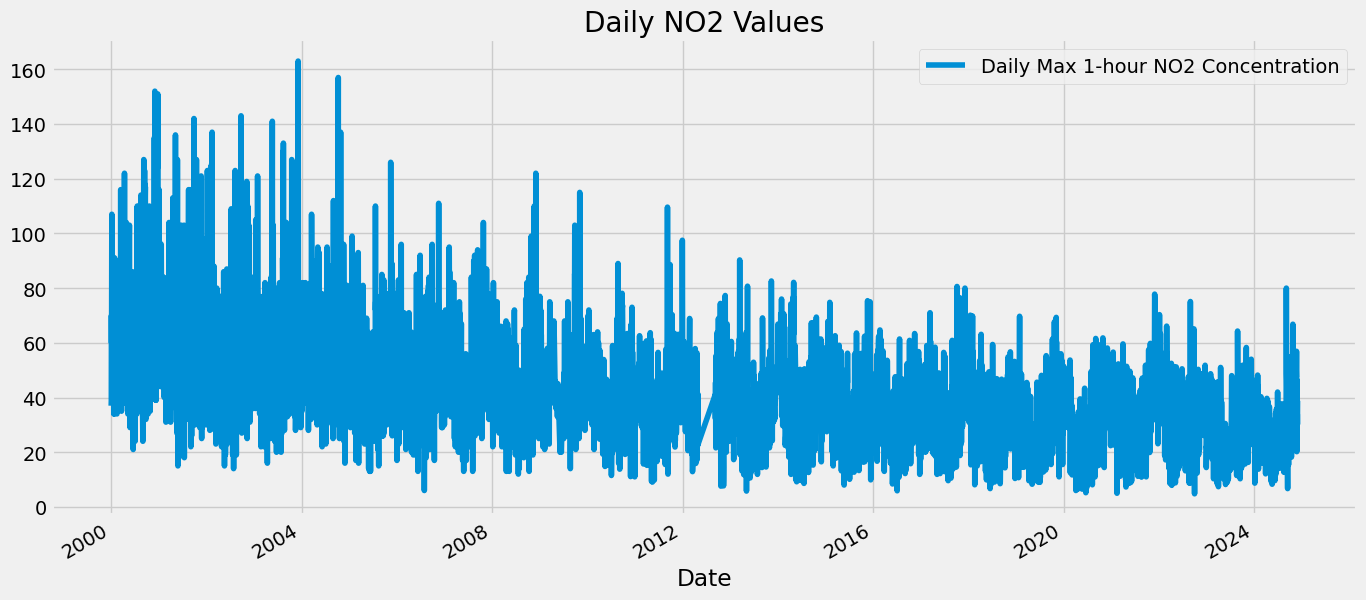

In [ ]:
data1.plot(
    figsize=(15, 7),
    color=color_pal[0],
    title='Daily NO2 Values'
)
plt.show()

<Axes: ylabel='Frequency'>

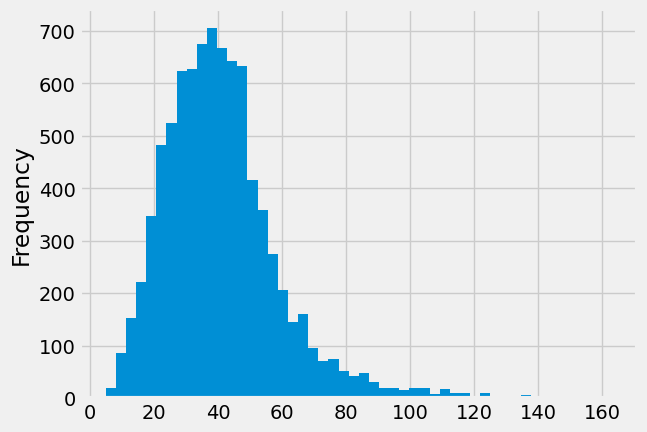

In [ ]:
data1['Daily Max 1-hour NO2 Concentration'].plot(kind='hist', bins=50)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
tss = TimeSeriesSplit(n_splits=5, test_size=365*1, gap=31)

In [ ]:
data = data1.sort_index()

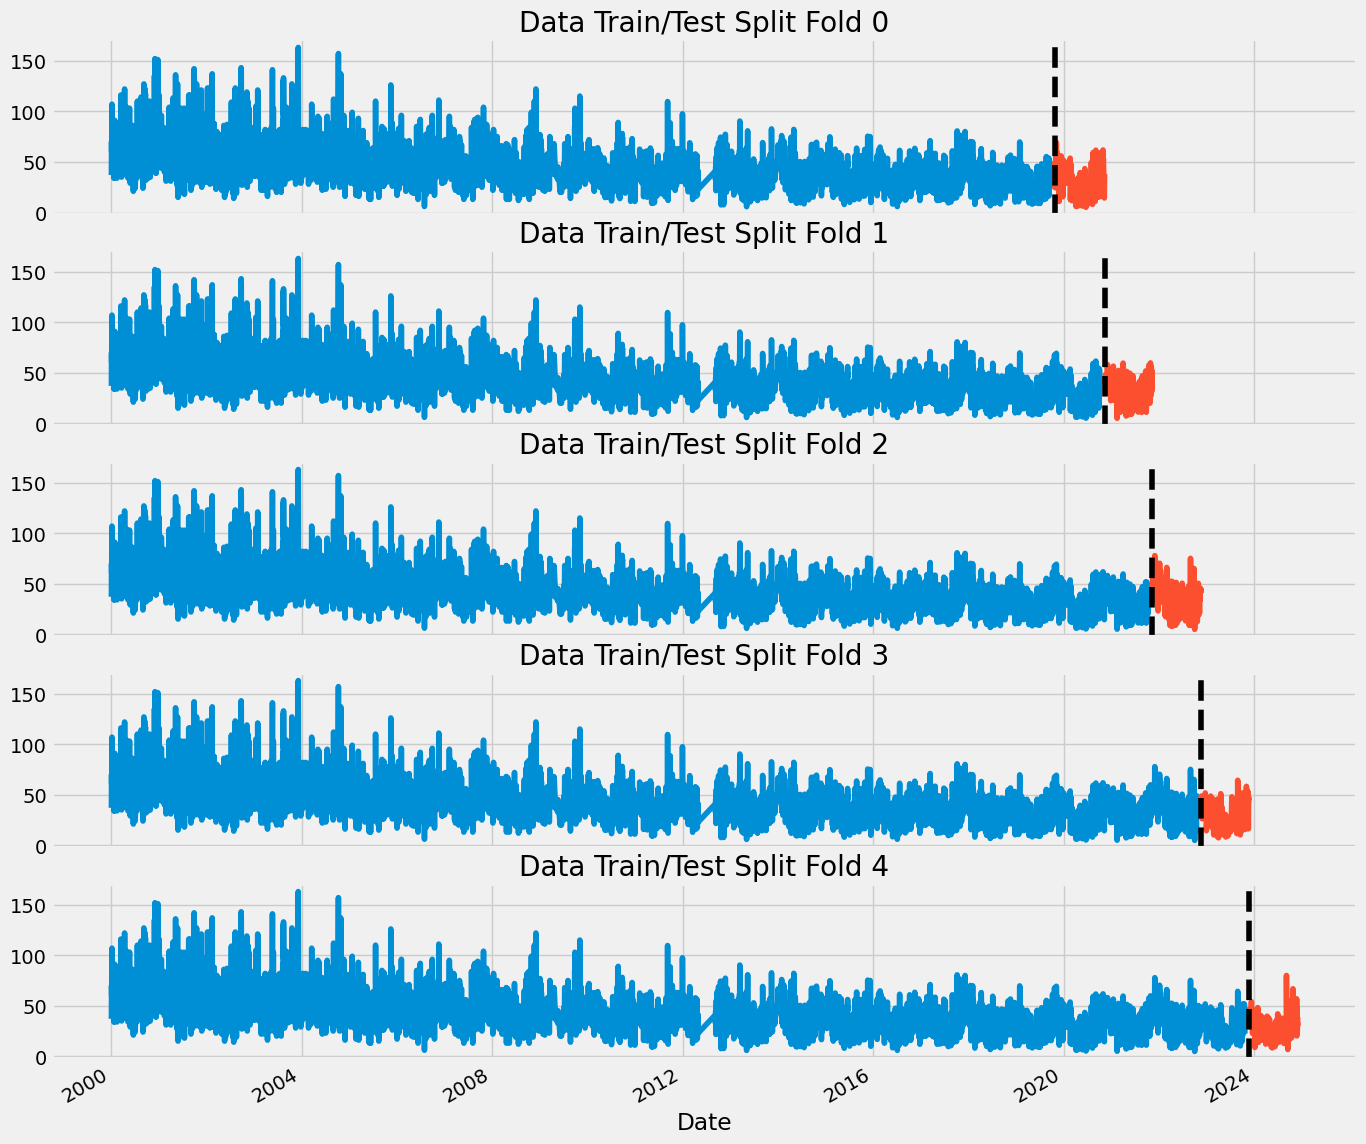

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0

for train_idx, val_idx in tss.split(data):
    train = data.iloc[train_idx]
    test = data.iloc[val_idx]
    train['Daily Max 1-hour NO2 Concentration'].plot(ax=axs[fold],
                                                      label='Training Set',
                                                      title=f'Data Train/Test Split Fold {fold}')
    test['Daily Max 1-hour NO2 Concentration'].plot(ax=axs[fold],
                                                     label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1

In [ ]:
def create_features(data):
  data = data.copy()
  data['dayofweek'] = data.index.dayofweek
  data['quarter'] = data.index.quarter
  data['month'] = data.index.month
  data['year'] = data.index.year
  data['dayofyear'] = data.index.dayofyear
  data['dayofmonth'] = data.index.day
  data['weekofyear'] = data.index.isocalendar().week
  return data

data = create_features(data)

In [ ]:
def add_lags(data):
  target_map = data['Daily Max 1-hour NO2 Concentration'].to_dict()
  data['lag1'] = (data.index - pd.Timedelta('7 days')).map(target_map)
  data['lag2'] = (data.index - pd.Timedelta('14 days')).map(target_map)
  data['lag3'] = (data.index - pd.Timedelta('31 days')).map(target_map)
  data['lag4'] = (data.index - pd.Timedelta('92 days')).map(target_map)
  data['lag5'] = (data.index - pd.Timedelta('364 days')).map(target_map)
  data['lag6'] = (data.index - pd.Timedelta('728 days')).map(target_map)
  return data

In [ ]:
data = add_lags(data)

In [ ]:
data

,Daily Max 1-hour NO2 Concentration,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,lag4,lag5,lag6
Date,,,,,,,,,,,,,,
2000-01-01,37.0,5,1,1,2000,1,1,52,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,39.0,6,1,1,2000,2,2,52,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,70.0,0,1,1,2000,3,3,1,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,60.0,1,1,1,2000,4,4,1,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,81.0,2,1,1,2000,5,5,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-26,46.4,1,4,11,2024,331,26,48,39.1,41.5,62.0,26.2,39.5,37.7
2024-11-27,24.3,2,4,11,2024,332,27,48,49.6,43.3,41.1,18.6,34.3,29.3
2024-11-28,33.9,3,4,11,2024,333,28,48,47.4,36.8,23.5,17.2,30.5,28.9


In [ ]:
tss =  TimeSeriesSplit(n_splits=5, test_size=365*1, gap=31)
data = data.sort_index()

fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(data):
  train = data.iloc[train_idx]
  test = data.iloc[val_idx]

  TARGET = 'Daily Max 1-hour NO2 Concentration'
  FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6']

  X_train = train[FEATURES]
  y_train = train[TARGET]

  X_test = test[FEATURES]
  y_test = test[TARGET]

  reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                         n_estimators=1000,
                         early_stopping_rounds=50,
                         objective='reg:linear',
                         max_depth=3,
                         learning_rate=0.01)
  reg.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=100)

  y_pred = reg.predict(X_test)
  preds.append(y_pred)
  score = np.sqrt(mean_squared_error(y_test, y_pred))
  scores.append(score)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:28:21] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:46.69868	validation_1-rmse:32.87869
[100]	validation_0-rmse:22.46091	validation_1-rmse:14.79258
[200]	validation_0-rmse:16.34129	validation_1-rmse:11.22505
[300]	validation_0-rmse:15.09178	validation_1-rmse:10.82650
[400]	validation_0-rmse:14.77567	validation_1-rmse:10.74834
[500]	validation_0-rmse:14.61426	validation_1-rmse:10.72601
[600]	validation_0-rmse:14.47874	validation_1-rmse:10.71105
[700]	validation_0-rmse:14.36928	validation_1-rmse:10.69892
[767]	validation_0-rmse:14.30359	validation_1-rmse:10.69941
[0]	validation_0-rmse:46.09306	validation_1-rmse:32.35889
[100]	validation_0-rmse:22.17504	validation_1-rmse:14.11354


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:28:24] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:16.13186	validation_1-rmse:10.22987
[300]	validation_0-rmse:14.90738	validation_1-rmse:9.68994
[400]	validation_0-rmse:14.59345	validation_1-rmse:9.59779
[500]	validation_0-rmse:14.43324	validation_1-rmse:9.57261
[600]	validation_0-rmse:14.32421	validation_1-rmse:9.55900
[700]	validation_0-rmse:14.21949	validation_1-rmse:9.55030
[800]	validation_0-rmse:14.12246	validation_1-rmse:9.54702
[812]	validation_0-rmse:14.11156	validation_1-rmse:9.54825
[0]	validation_0-rmse:45.51433	validation_1-rmse:35.09847
[100]	validation_0-rmse:21.89659	validation_1-rmse:16.89003


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:28:26] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:15.93605	validation_1-rmse:12.55069
[300]	validation_0-rmse:14.71683	validation_1-rmse:11.68524
[400]	validation_0-rmse:14.40222	validation_1-rmse:11.44865
[500]	validation_0-rmse:14.24948	validation_1-rmse:11.38842
[600]	validation_0-rmse:14.13989	validation_1-rmse:11.36556
[700]	validation_0-rmse:14.04301	validation_1-rmse:11.35322
[732]	validation_0-rmse:14.01219	validation_1-rmse:11.35263
[0]	validation_0-rmse:45.09617	validation_1-rmse:30.76079
[100]	validation_0-rmse:21.70211	validation_1-rmse:13.05206


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:28:27] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:15.79367	validation_1-rmse:9.69341
[300]	validation_0-rmse:14.60149	validation_1-rmse:9.49395
[318]	validation_0-rmse:14.51970	validation_1-rmse:9.51365
[0]	validation_0-rmse:44.53845	validation_1-rmse:30.05330
[100]	validation_0-rmse:21.43202	validation_1-rmse:12.48526


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:28:27] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:15.61005	validation_1-rmse:8.97711
[300]	validation_0-rmse:14.42583	validation_1-rmse:8.79733
[316]	validation_0-rmse:14.34988	validation_1-rmse:8.81607


In [ ]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores: {scores}')

Score across folds 9.9677
Fold scores: [10.696495929813985, 9.54511908945132, 11.351651799646094, 9.468319470092135, 8.776835573858772]


In [ ]:
# Retrain on all data
data = create_features(data)

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6']
TARGET = 'Daily Max 1-hour NO2 Concentration'

X_all = data[FEATURES]
y_all = data[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=500,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[0]	validation_0-rmse:44.00602


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:35:10] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:21.16020
[200]	validation_0-rmse:15.39235
[300]	validation_0-rmse:14.21827
[400]	validation_0-rmse:13.90651
[499]	validation_0-rmse:13.74981


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
data.index.max()

Timestamp('2024-11-30 00:00:00')

In [ ]:
# Create future dataframe
future = pd.date_range('2024-11-30', '2025-11-01')
future_data = pd.DataFrame(index=future)
future_data['isFuture'] = True
data['isFuture'] = False
data_and_future = pd.concat([data, future_data])
data_and_future = create_features(data_and_future)
data_and_future = add_lags(data_and_future)

In [ ]:
future_w_features = data_and_future.query('isFuture').copy()

In [ ]:
# Predict the Future

In [ ]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

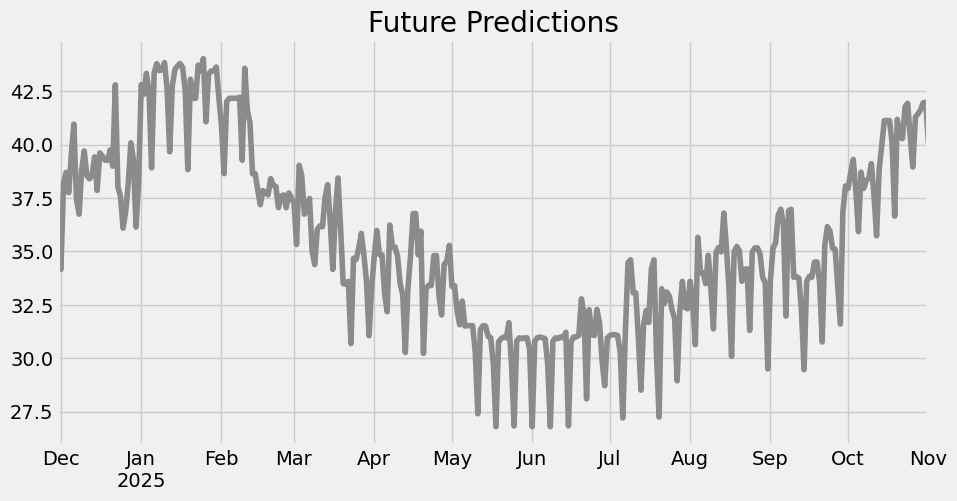

In [ ]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               title='Future Predictions')
plt.show()

In [ ]:
# Save model
reg.save_model('model.json')

In [ ]:
!git clone --branch agilancan https://github.com/DC-Capstone1W25/greenearthconnect.git

Cloning into 'greenearthconnect'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
%cd greenearthconnect

[Errno 2] No such file or directory: 'greenearthconnect'
/content


In [ ]:
!git add .
!git commit -m "Agilan's XGBoost Trained Model working"

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
